In [53]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

# Visualising counts of 30+@3 clients

In [104]:
#importing credit scores of 30+@3 clients
df = pd.read_csv("Credit Score.csv")

In [105]:
credit_scores = df["Credit Score"]

In [106]:
#writing a function to assign scores into buckets. buckets are based off STDEVS of clients who were funded
def credit_score_bracket(row):
    credit_score = row[1]
    credit = row[1]
    if credit < 915:
        return "Very Bad"
    elif credit >= 915 and credit < 1136:
        return "Bad"
    elif credit >= 1136 and credit < 1357:
        return "Below Average"
    elif credit >= 1357 and credit < 1578:
        return "Above Average"
    elif credit >= 1578 and credit < 1799:
        return "Good"
    else:
        return "Outstanding"
    
brackets = df.apply(credit_score_bracket, axis = 1)

In [107]:
#inserting result of function as a column in dataframe
df.insert(loc = 2, column = "Credit Score Bracket", value = brackets, allow_duplicates = True)

In [108]:
#cleaning unnecessary column
df = df.drop(labels = "RecordID", axis = 1)

In [109]:
#creating two series for visualisation, one with value counts.
s1 = df["Credit Score Bracket"].value_counts(sort = False).reindex(["Very Bad", "Bad", "Below Average", "Above Average"])

In [110]:
# Since no "good" or "outstanding" clients were 3 month defaulters, separate Series was created for visualisation clarity. 
s2 = pd.Series(data = {"Good":0, "Outstanding":0})

In [111]:
credit_score_buckets_counts = pd.concat([s1, s2])

<AxesSubplot:>

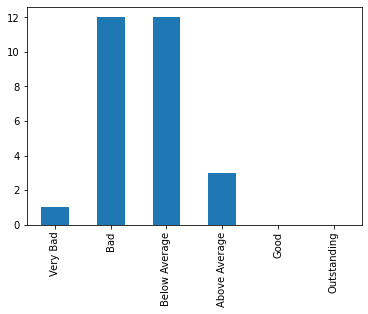

In [112]:
#simple visualisation showing value count of 30+@3 clients per credit score bracket
credit_score_buckets_counts.plot(kind = "bar")

# Visualising 30+@3 Percentage for each Credit Bucket

In [ ]:
#import csv of total settled loans and their credit score
df1 = pd.read_csv("Total Settled Loans Credit Score.csv")

In [122]:
# similiar function to divide into buckets
def credit_score_bracket(row):
    credit_score = row[1]
    credit = row[1]
    if credit < 915:
        return "Very Bad"
    elif credit >= 915 and credit < 1136:
        return "Bad"
    elif credit >= 1136 and credit < 1357:
        return "Below Average"
    elif credit >= 1357 and credit < 1578:
        return "Above Average"
    elif credit >= 1578 and credit < 1799:
        return "Good"
    else:
        return "Outstanding"
    
brackets2 = df1.apply(credit_score_bracket, axis = 1)
       

In [125]:
#inserting result into DF
df1.insert(loc = 2, column = "Credit Score Bracket", value = brackets2, allow_duplicates = True)

In [127]:
#cleaning for readability
df1 = df1.drop(labels = "RecordID", axis = 1)

In [131]:
#obtaining total counts for each credit score bracket
total_counts = df1["Credit Score Bracket"].value_counts().reindex(["Very Bad", "Bad", "Below Average", "Above Average", "Good", "Outstanding"])

In [200]:
#combining 30+@3 clients with total clients in each credit bucket
df2 = pd.concat([credit_score_buckets_counts, total_counts], axis = 1)
df2 = df2.rename(columns = {0:"Defaults", "Credit Score Bracket": "Total Loans"})
df2

,Defaults,Total Loans
Very Bad,1,45
Bad,12,881
Below Average,12,1721
Above Average,3,1770
Good,0,832
Outstanding,0,107


In [154]:
#obtaining default percentage
df2["percentage"] = df2["Defaults"] / df2["Total Loans"]
percent = df2["percentage"]*100

In [161]:
percent

Very Bad         2.222222
Bad              1.362089
Below Average    0.697269
Above Average    0.169492
Good             0.000000
Outstanding      0.000000
Name: percentage, dtype: float64

<AxesSubplot:xlabel='Credit Bucket', ylabel='30+@3 Percentage'>

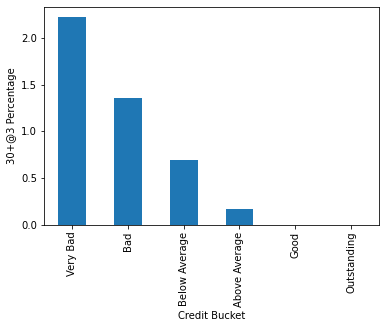

In [160]:
#visualise
percent.plot(kind = "bar", xlabel = "Credit Bucket", ylabel = "30+@3 Percentage")

# 30+@3 per month

In [194]:
#import csv of data from SQL
df2 = pd.read_csv("Months.csv")

In [195]:
#remove day for better readability
df2["loan_settlement_month"] = df2["loan_settlement_month"].str[:-3]

In [196]:
#find value counts per month
month = df2["loan_settlement_month"].value_counts().sort_index()

<AxesSubplot:xlabel='Month', ylabel='30+@3 count'>

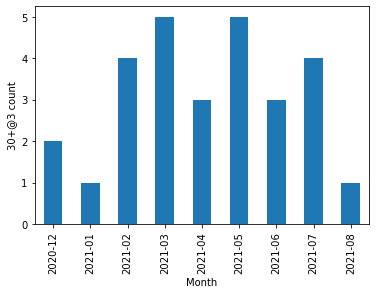

In [197]:
#visualise
month.plot(kind = "bar", xlabel = "Month", ylabel = "30+@3 count")